In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
res = pd.read_csv('nitish_results.csv')

In [3]:
res.head()

,image,fear,happy,neutral,anger,sad
0,anger (1).jpeg,0.136133,0.358521,0.317268,0.136966,0.051111
1,anger (10).jpeg,0.128817,0.222784,0.136143,0.069375,0.442881
2,anger (100).jpeg,0.236790,0.112143,0.475546,0.091641,0.083881
3,anger (101).jpeg,0.349327,0.197968,0.027660,0.059322,0.365724
4,anger (102).jpeg,0.358879,0.033978,0.130938,0.329667,0.146538


In [4]:
true = res.image.map(lambda x: 1 if x.find('fear') > -1
             else 2 if x.find('happy') > -1
              else 3 if x.find('neutral') > -1 
              else 0 if x.find('anger') > -1
              else 4 )
true_val = true.values.tolist()

In [5]:
pred = res[['neutral','happy','sad','fear','anger']]
pl = pred.values.tolist()
prediction = np.argmax(pl,axis=1)
prediction

array([1, 2, 0, 2, 3, 4, 3, 2, 1, 3, 1, 3, 4, 2, 3, 1, 1, 1, 0, 2, 2, 0, 1,
       0, 4, 3, 0, 3, 1, 4, 3, 1, 3, 3, 2, 2, 2, 4, 4, 3, 4, 1, 4, 0, 1, 3,
       2, 3, 4, 4, 3, 0, 3, 0, 2, 3, 3, 1, 4, 0, 2, 3, 2, 1, 2, 2, 2, 3, 3,
       4, 3, 2, 3, 4, 0, 1, 4, 0, 3, 3, 3, 3, 3, 2, 3, 3, 1, 1, 4, 2, 4, 4,
       4, 4, 3, 4, 2, 2, 3, 4, 3, 1, 0, 3, 2, 3, 3, 0, 4, 4, 1, 4, 1, 4, 3,
       0, 4, 4, 4, 0, 1, 4, 4, 0, 4, 4, 4, 3, 1, 4, 3, 2, 3, 4, 4, 3, 0, 2,
       2, 3, 3, 3, 1, 4, 3, 3, 3, 2, 2, 3, 1, 3, 4, 0, 2, 0, 4, 0, 3, 1, 3,
       1, 3, 4, 0, 4, 0, 4, 3, 2, 4, 4, 3, 3, 3, 3, 2, 3, 0, 3, 0, 3, 3, 4,
       2, 4, 4, 3, 3, 3, 2, 0, 2, 4, 3, 3, 1, 4, 2, 3, 2, 0, 4, 3, 3, 3, 3,
       4, 3, 0, 4, 3, 4, 3, 4, 0, 3, 3, 1, 0, 2, 3, 3, 3, 0, 4, 1, 1, 3, 2,
       3, 3, 3, 3, 4, 3, 1, 3, 3, 0, 1, 4, 1, 1, 1, 3, 1, 1, 3, 4, 0, 0, 2,
       3, 3, 4, 2, 3, 3, 3, 1, 3, 3, 1, 3, 2, 4, 3, 1, 1, 0, 1, 1, 0, 2, 4,
       4, 1, 4, 3, 4, 2, 0, 1, 1, 2, 1, 1, 1, 1, 4, 4, 1, 2, 0, 1, 3, 3, 4,
       1, 1,

In [6]:
def save_confusion_matrix(title, classes, true, pred, cmap=plt.cm.Blues,normalize=False):

    # Get the confusion matrix using sklearn.
    cm = confusion_matrix(y_true=true,
                          y_pred=pred)

    # Print the confusion matrix as text.
    print("confusion matrix: \n", cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    plt.savefig(title + '_metrics.eps', bbox_inches='tight', format='eps', dpi=50)
    plt.show()

In [19]:
prediction

array([1, 2, 0, 2, 3, 4, 3, 2, 1, 3, 1, 3, 4, 2, 3, 1, 1, 1, 0, 2, 2, 0, 1,
       0, 4, 3, 0, 3, 1, 4, 3, 1, 3, 3, 2, 2, 2, 4, 4, 3, 4, 1, 4, 0, 1, 3,
       2, 3, 4, 4, 3, 0, 3, 0, 2, 3, 3, 1, 4, 0, 2, 3, 2, 1, 2, 2, 2, 3, 3,
       4, 3, 2, 3, 4, 0, 1, 4, 0, 3, 3, 3, 3, 3, 2, 3, 3, 1, 1, 4, 2, 4, 4,
       4, 4, 3, 4, 2, 2, 3, 4, 3, 1, 0, 3, 2, 3, 3, 0, 4, 4, 1, 4, 1, 4, 3,
       0, 4, 4, 4, 0, 1, 4, 4, 0, 4, 4, 4, 3, 1, 4, 3, 2, 3, 4, 4, 3, 0, 2,
       2, 3, 3, 3, 1, 4, 3, 3, 3, 2, 2, 3, 1, 3, 4, 0, 2, 0, 4, 0, 3, 1, 3,
       1, 3, 4, 0, 4, 0, 4, 3, 2, 4, 4, 3, 3, 3, 3, 2, 3, 0, 3, 0, 3, 3, 4,
       2, 4, 4, 3, 3, 3, 2, 0, 2, 4, 3, 3, 1, 4, 2, 3, 2, 0, 4, 3, 3, 3, 3,
       4, 3, 0, 4, 3, 4, 3, 4, 0, 3, 3, 1, 0, 2, 3, 3, 3, 0, 4, 1, 1, 3, 2,
       3, 3, 3, 3, 4, 3, 1, 3, 3, 0, 1, 4, 1, 1, 1, 3, 1, 1, 3, 4, 0, 0, 2,
       3, 3, 4, 2, 3, 3, 3, 1, 3, 3, 1, 3, 2, 4, 3, 1, 1, 0, 1, 1, 0, 2, 4,
       4, 1, 4, 3, 4, 2, 0, 1, 1, 2, 1, 1, 1, 1, 4, 4, 1, 2, 0, 1, 3, 3, 4,
       1, 1,

NameError: name 'cats' is not defined

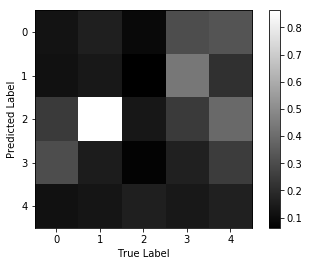

In [21]:
cm=confusion_matrix(true_val,prediction)

plt.imshow(cm/np.sum(cm, axis=1), cmap=plt.get_cmap('gray'))
plt.colorbar()
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
cats_labs = [cat.strip('proc_') for cat in cats]
plt.xticks([0,1,2,3,4], cats_labs)
plt.yticks([0,1,2,3,4], cats_labs);

confusion matrix: 
 [[ 17  21  24  40  36]
 [ 16  18  16  57  24]
 [ 34 113  35  32  43]
 [ 42  20  19  22  28]
 [ 16  17  41  18  18]]
Confusion matrix, without normalization
[[ 17  21  24  40  36]
 [ 16  18  16  57  24]
 [ 34 113  35  32  43]
 [ 42  20  19  22  28]
 [ 16  17  41  18  18]]


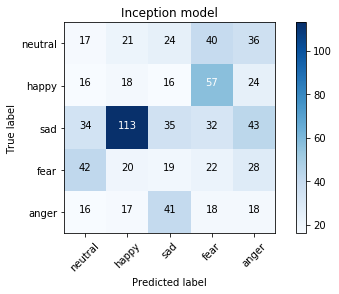

In [22]:
from sklearn.preprocessing import LabelEncoder
import itertools
le = LabelEncoder()
le.fit(['neutral','happy','sad','fear','anger'])
le.inverse_transform([0,1,2,3,4])
save_confusion_matrix('Inception model', ['neutral','happy','sad','fear','anger'], true_val, prediction)

In [8]:
print('Inception model accuracy: '+ str(sum((true_val - prediction) == 0)/len(true_val)*100) + '%')

Inception model accuracy: 14.3415906128%


In [9]:
le.fit(['fear','happy','neutral','anger','sad'])
le.inverse_transform([0,1,2,3,4])

array(['anger', 'fear', 'happy', 'neutral', 'sad'], 
      dtype='<U7')